#**OVERFITTING & UNDERFITTING**

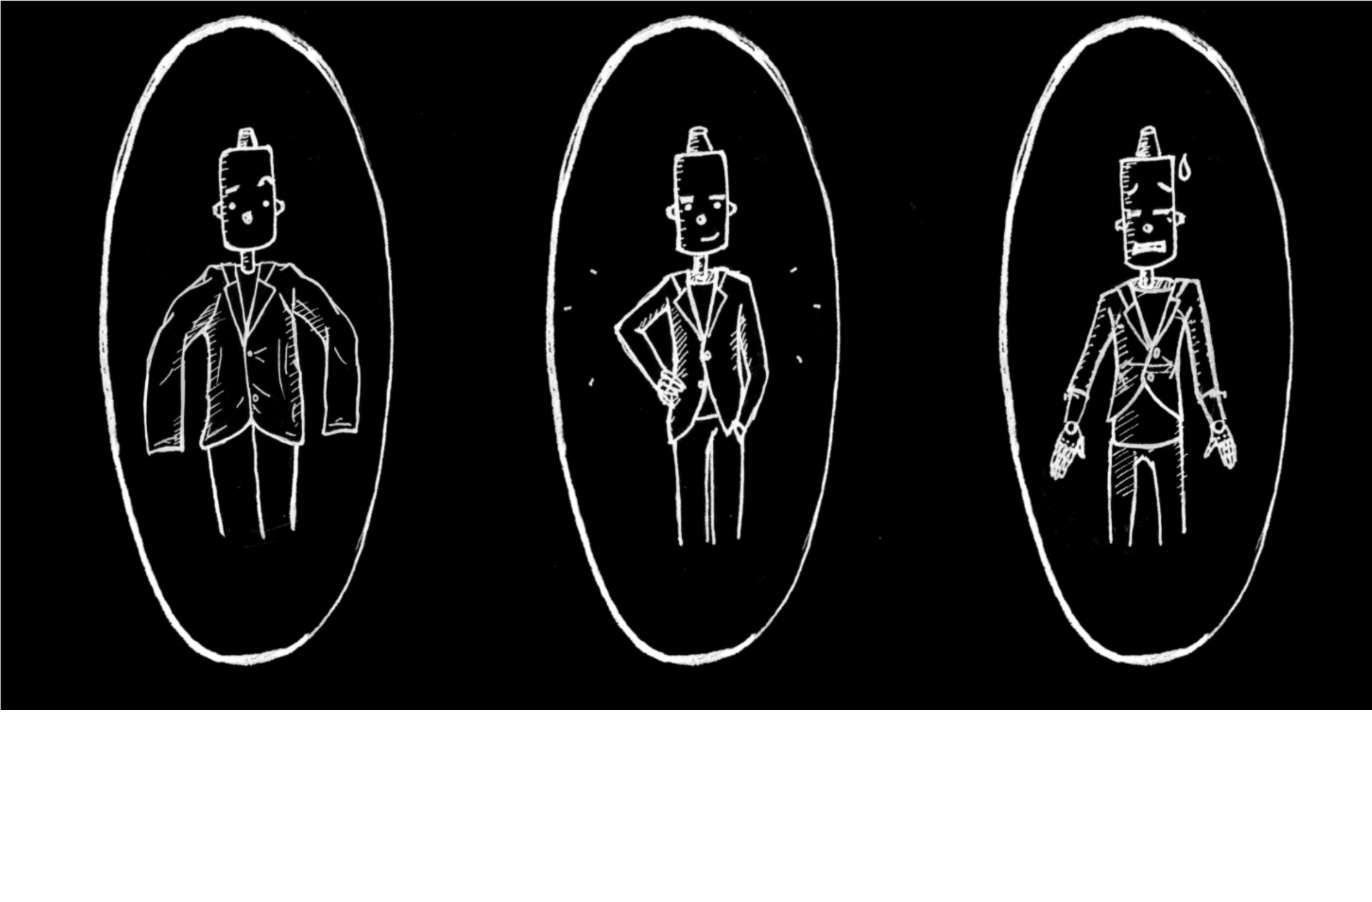

Ejemplo:

> Tres estudiantes y examen de matemáticas: Memorización (overfitting), solo suma (underfitting)

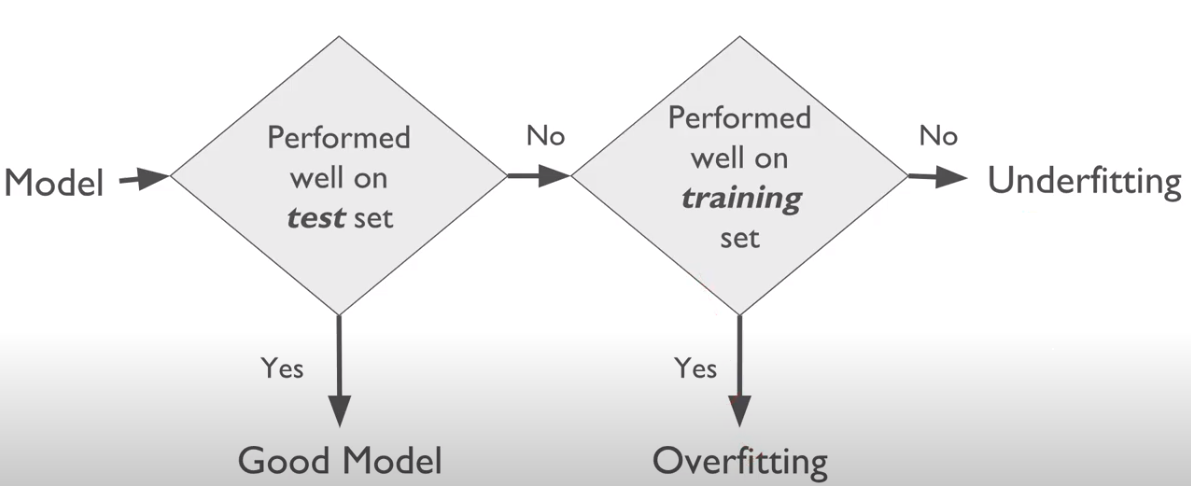

Un reto importante es detectar durante el aprendizaje el **underfitting**, **overfitting** o el **best fit**. 

Si nuestro modelo se comporta bien tanto en el entrenamiento (88-92%) como en las pruebas (90% accuracy) se considera bien ajustado.

Para prevenir el *overfitting*:

* cross-validation
* entrenar con más datos
* data augmentation
* reducir complejidad o simplificar datos
* regularización
* ensembling
* early stopping




##Interpretación de las curvas de aprendizaje

Se puede pensar que la información en los datos de entrenamiento es de dos tipos: *señales* y *ruido*. Las señales es la parte que generaliza, la parte que nos ayuda a que el modelo haga predicciones con nuevos datos. El ruido es la parte que sólo funciona para los datos de entrenamiento, está en el mundo real o de forma incidental, no ayudan al modelo a hacer predicciones, parece útil pero no lo es.

Cuando se entrena un modelo se seleccionan los pesos y parámetros que minimizan el *loss* en el conjunto de entrenamiento y se evaluan con los datos de validación o prueba. 

Se grafica el *loss* del conjunto de entrenamiento **epoch** por **epoch** y esto mismo se puede hacer con los datos de validación. Esto se conoce como  **curvas de aprendizaje**.

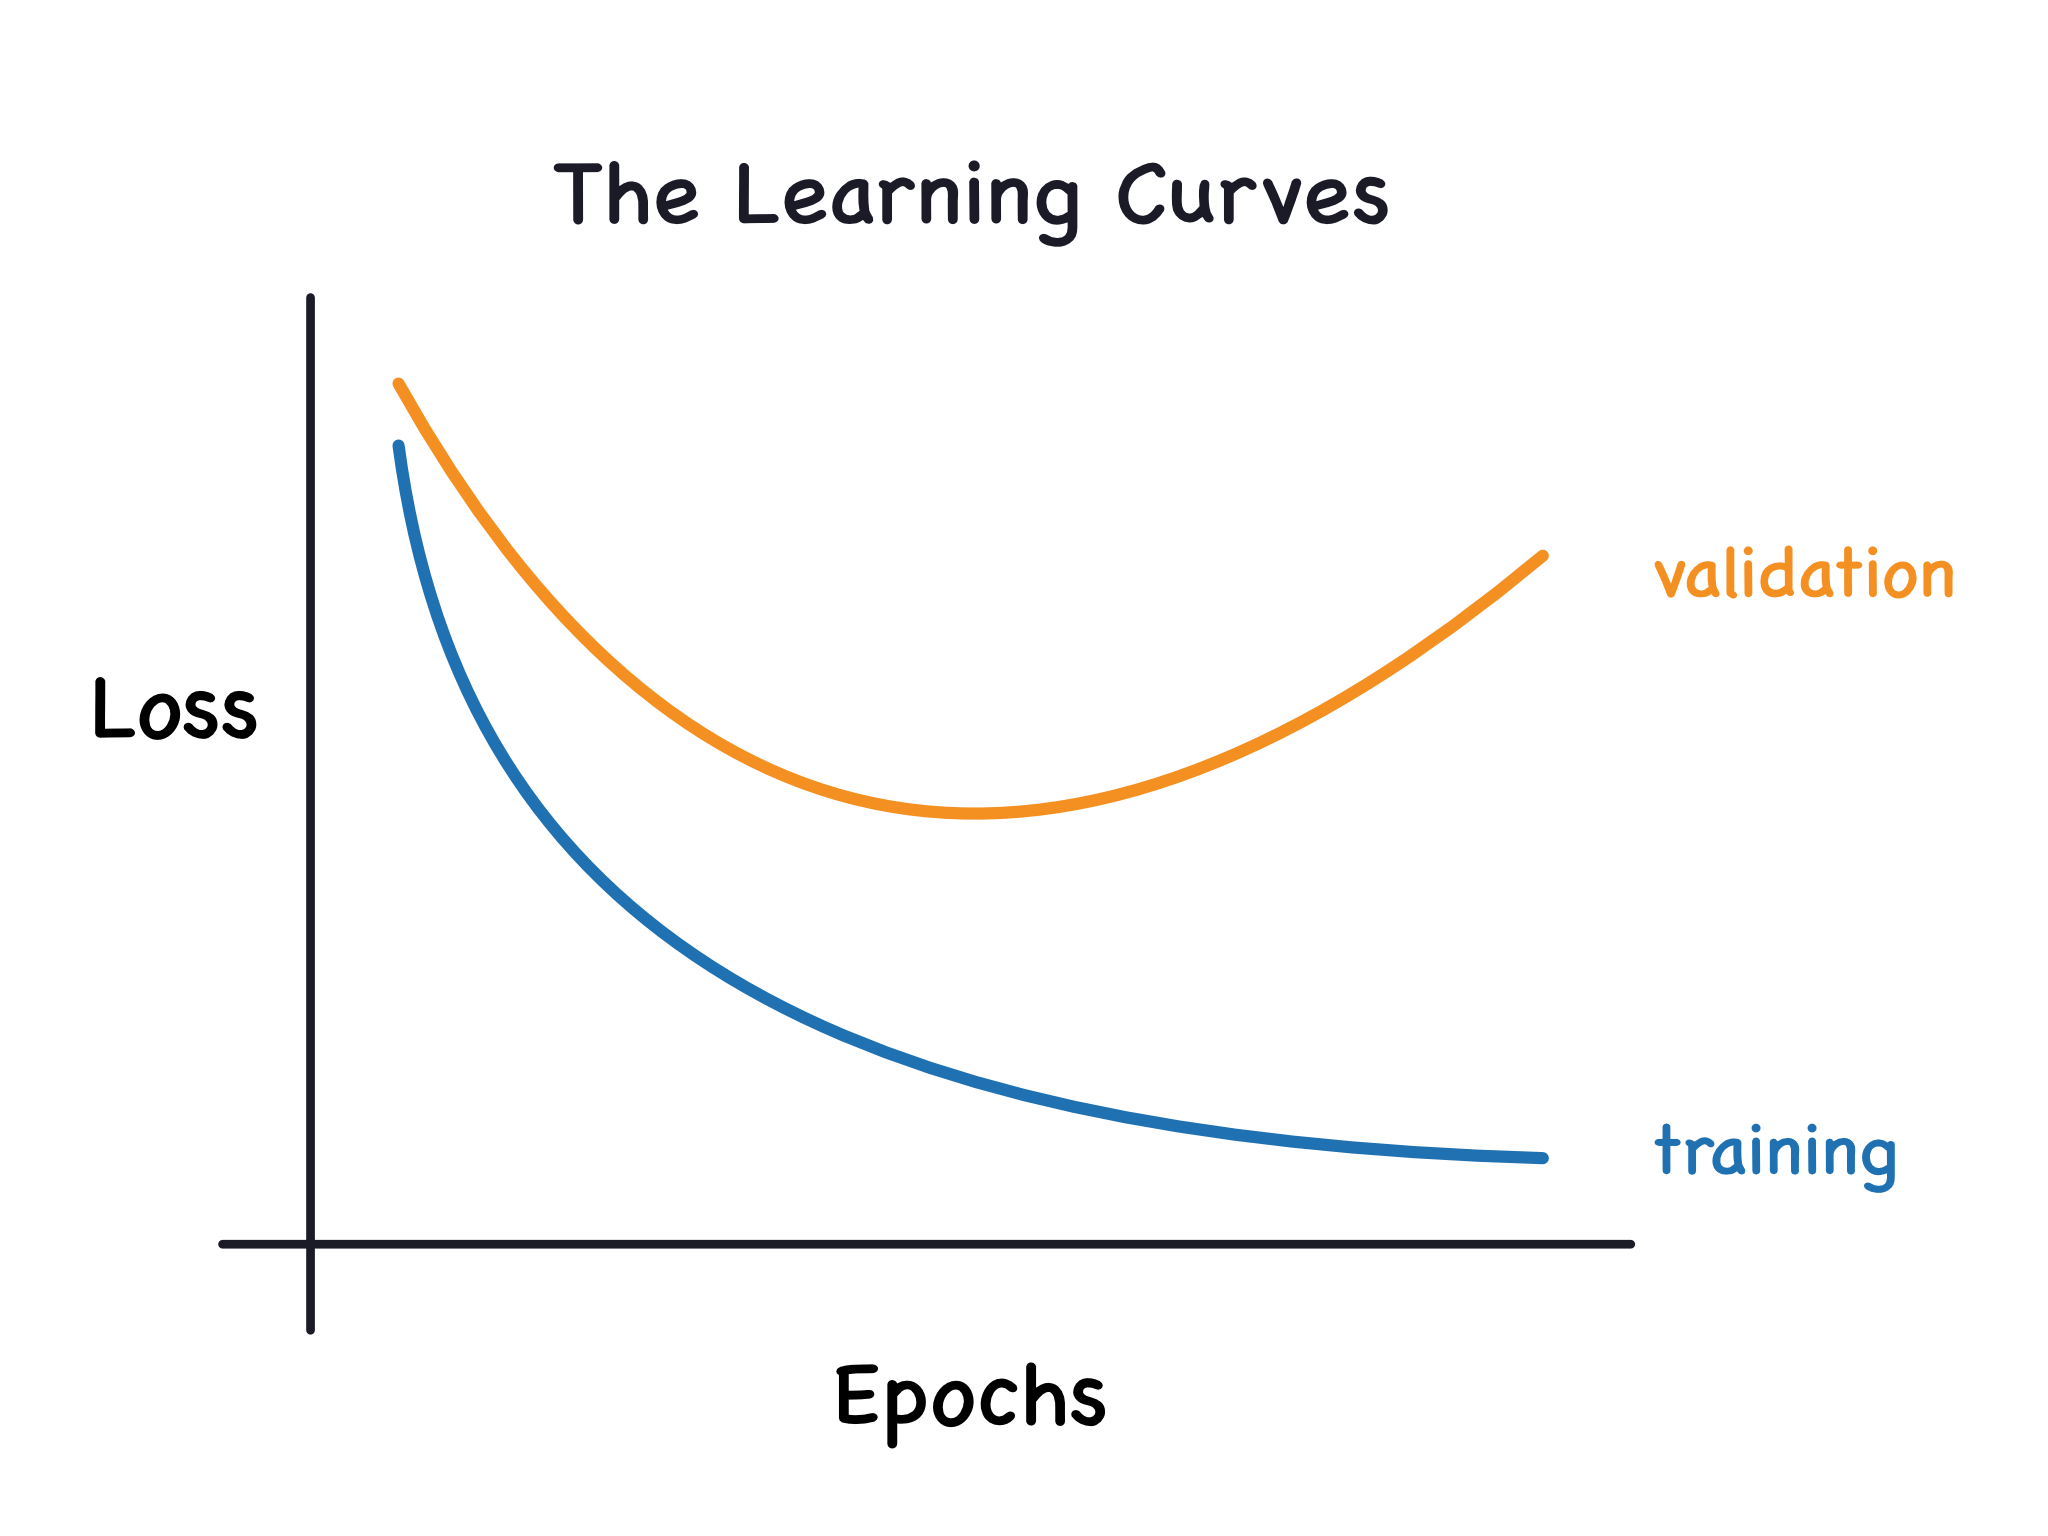

Durante el entrenamiento el loss baja cuando aprende tanto señales como ruido. Pero en la validación el loss bajará cuando el modelo aprenda señales. Así que cuando un modelo aprende señales las dos curvas bajan, pero cuando aprende ruido se generá un gap entre las curvas. El tamaño del gap identifica cuánto ruido ha aprendido el modelo.

Idealmente, deben crearse modelos que aprendan todas las señales y ningún ruido, pero esto no sucede, pero se puede negociar. Convendrá aprender cuando se tengan más señales que ruido, esto es cuando el loss en la validación continue decreciendo y el loss en la validación comience a incrementarse.

Esta negociación indica que puede haber dos problemas durante el entrenamiento del modelo: no hay suficientes señales o hay mucho ruido. Ocurre *underfitting* en el conjunto de entrenamiento cuando el loss no es lo suficientemente bajo debido a que el modelo no ha aprendido suficientes señales. Ocurre *overfitting* cuando el modelo ha aprendido demasiado ruido. El truco consiste en encontrar un balance.


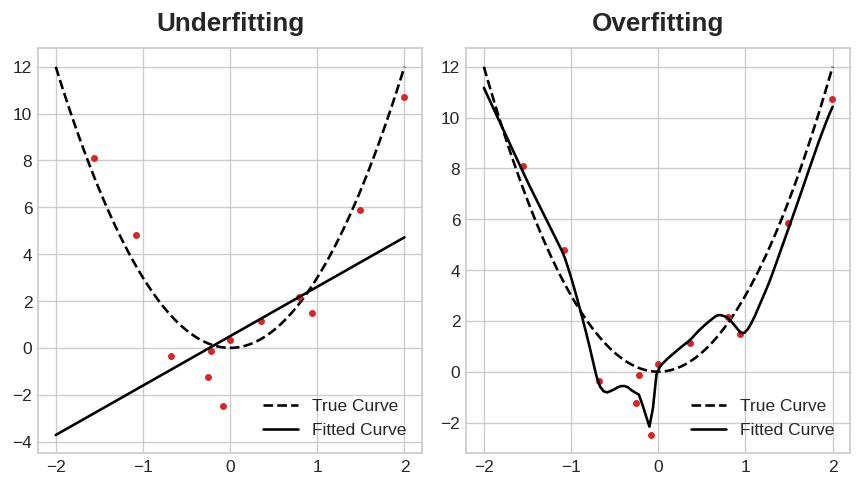

###Capacidad

La capacidad de un modelo se refiere al tamaño y complejidad de los patrones que es capaz de aprender. En las ANN, esto está determinado por el `número de neuronas` y cómo están conectadas. Si la red sufre de *underfitting* debe intentarse incrementar su capacidad.

La capacidad puede incrementarse aumentando tanto el ancho (más unidades en las capas existentes) como la profundidad (añadir más niveles). Las redes más anchas tienen un mejor tiempo de aprendizaje para relaciones lineales, mientras que las más profundas prefieren las no lineales. Esto depende del datset.


##Early Stopping

Cuando un modelo está aprendiendo ruido, el loss en la validación se incrementa. Para prevenir esto, se puede interrumpir el entrenamiento, esto se conoce como **early stopping**.

Cuando el loss en la validación comienza a crecer, se puede regresar a los valores anteriores, cuando ocurrió el mínimo, lo que asegura que el modelo no continuará aprendiendo ruido y se sobre entrenará.

Entrenar con early stopping también asegura no detener el entrenamiento demasiado pronto, antes de que termine de aprender las señales, previniendo el overfitting.

En Keras es sólo una función de muchas, también las puede definir el programador.

In [2]:
from google.colab import  ve			
drive .mount(			
'/content/d rive ')			
tensorflow .keras.callbacks			
EarlyStopping			
from			
im port			
early_stopping = EarlyStopping (			
"min_delta=0.001, # cambio minima"			
"patience=20, #  numero de epochs antes de detenerse"			
"restore_best_weights=True,"	

SyntaxError: ignored

In [4]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
min_delta=0.001, # cambio minimo
patience=26, # numero de epochs antes de detenerse
restore_best_weights=True,)

Mounted at /content/drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001, # cambio mínimo 
    patience=20, # número de epochs antes de detenerse
    restore_best_weights=True,
)

import pandas as pd
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/winequality-red.csv"
red_wine = pd.read_csv (path)



# Divide en entrenamiento y validación
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

#Normalización entre [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Divide en características y objetivo
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Ejemplo con early stopping

Preparación de los datos

In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/winequality-red.csv"
red_wine = pd.read_csv (path)

In [ ]:
# Divide en entrenamiento y validación
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

#Normalización entre [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
Z
# Divide en características y objetivo
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [5]:
#Se incrementará la capacidad de la red
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, #mínimo cambio considerado
    patience=20, # número de epochs antes de detenerse
    restore_best_weights=True,
)

#Se incrementara la capacidad de la red
from tensorflow import keras
from tensorflow.keras import layers, callbacks

early_stopping = callbacks.EarlyStopping(
min_delta=0.001, #minimo cambio considerado
patience=20, # numero de epochs antes de detenerse
restore_best_weights=True,)


model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='adam',
    loss='mae',
)

Mínimo loss en validación: 0.09215933829545975


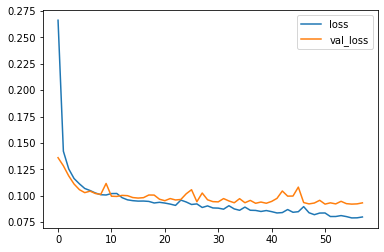

In [ ]:
#Entrenamiento
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], 
    verbose=0,  # apagar los log de entrenamiento
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Mínimo loss en validación: {}".format(history_df['val_loss'].min()))

#Ejercicios

Predicción de qué tan popular es una canción. Considerar el dataset [spotify](https://www.kaggle.com/masufaar/spotifycsv)

In [ ]:
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/spotify.csv"
spotify = pd.read_csv (path)

In [ ]:
spotify.head ()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
spotify.describe ()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


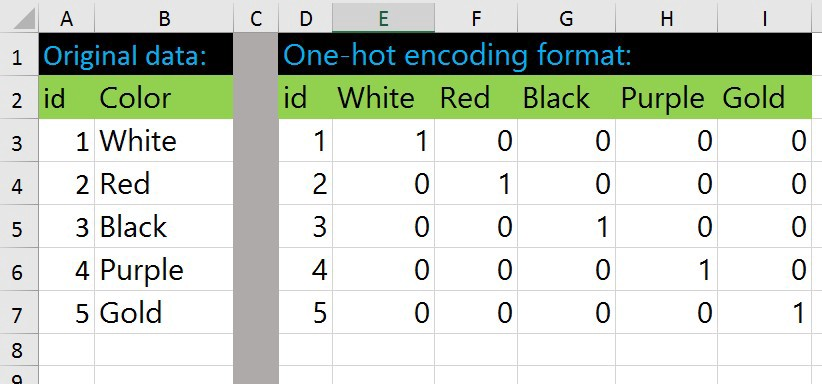

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

In [ ]:
X = spotify.copy().dropna()   # Quita los valores NaN, Si los hubiera, hace una copia del data set
y = X.pop('track_popularity') # Se crea la columna de salida para entrenar el modelo
artists = X ['track_artist']  # 

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']        #Se separan las caracteristicas numericas 
features_cat = ['playlist_genre']                                     #Caracteristicas no númericas

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# para mantener a todos los artistas juntos
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists) #Se divide el conjunto de entrenamiento y de validación para el modelo

X_train = preprocessor.fit_transform(X_train) #se entrena el modelo 
X_valid = preprocessor.transform(X_valid) #Se hace la validación del modelo
y_train = y_train / 100 # popularity en escala de 0-100, se re-escala del 0-1
y_valid = y_valid / 100

input_shape = [X_train.shape[1]] #Para conocer el tamaño de entrada de nuestra red neouronal
print("Input shape: {}".format(input_shape)) #Ver la salida 

Input shape: [18]


Modelo lineal de una red, con baja capacidad.

Minimum Validation Loss: 0.1991


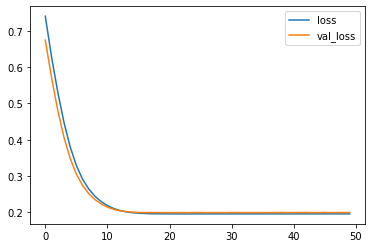

In [ ]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Es frecuente ver curvas como "bastón de hockey" como la anterior. Esto hace que sea difícil ver la última parte, así que se inicia con el epoch 10

Minimum Validation Loss: 0.1991


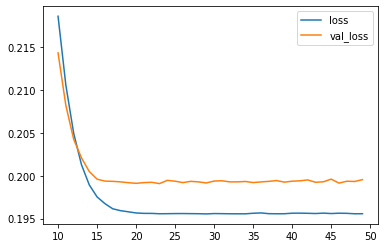

In [ ]:
# Inica la graficación en el epoch 10
history_df.loc[10:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

¿El modelo es underfitting, overfitting o está bien?

Para aumentar la capacidad de nuestra red, vamos a añadir 3 capas ocultas.

Epoch 1/50
48/48 [==============================] - 1s 18ms/step - loss: 0.2118 - val_loss: 0.2010
Epoch 2/50
48/48 [==============================] - 0s 9ms/step - loss: 0.1933 - val_loss: 0.2004
Epoch 3/50
48/48 [==============================] - 0s 9ms/step - loss: 0.1898 - val_loss: 0.1990
Epoch 4/50
48/48 [==============================] - 0s 10ms/step - loss: 0.1872 - val_loss: 0.1990
Epoch 5/50
48/48 [==============================] - 0s 9ms/step - loss: 0.1841 - val_loss: 0.1996
Epoch 6/50
48/48 [==============================] - 0s 9ms/step - loss: 0.1842 - val_loss: 0.2024
Epoch 7/50
48/48 [==============================] - 0s 10ms/step - loss: 0.1819 - val_loss: 0.1992
Epoch 8/50
48/48 [==============================] - 0s 10ms/step - loss: 0.1815 - val_loss: 0.2016
Epoch 9/50
48/48 [==============================] - 0s 10ms/step - loss: 0.1796 - val_loss: 0.2008
Epoch 10/50
48/48 [==============================] - 0s 9ms/step - loss: 0.1790 - val_loss: 0.1992
Epoch 11/50
48

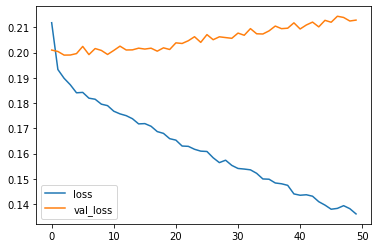

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

¿Cuál es la evaluación de estas curvas de aprendizaje?

Definición del early stopping.

Vamos a definir un early stopping que espere 5 epochs (`patience`), un cambio en el loss de validación de al menos 0.001 (`min_delta`) y que guarde los pesos del mejor loss (`restore_best_weights`).

In [ ]:
from tensorflow.keras import callbacks

early_stopping = callbacks.EarlyStopping (
    min_delta = 0.001,
    patience = 5,
    restore_best_weights= True
)

Epoch 1/50
48/48 [==============================] - 1s 6ms/step - loss: 0.2622 - val_loss: 0.2029
Epoch 2/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1974 - val_loss: 0.2000
Epoch 3/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1958 - val_loss: 0.1999
Epoch 4/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1956 - val_loss: 0.2028
Epoch 5/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1967 - val_loss: 0.1981
Epoch 6/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1951 - val_loss: 0.1982
Epoch 7/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1948 - val_loss: 0.1988
Epoch 8/50
48/48 [==============================] - 0s 5ms/step - loss: 0.1948 - val_loss: 0.1982
Epoch 9/50
48/48 [==============================] - 0s 4ms/step - loss: 0.1945 - val_loss: 0.1985
Epoch 10/50
48/48 [==============================] - 0s 5ms/step - loss: 0.1941 - val_loss: 0.1985
Minimum Validation 

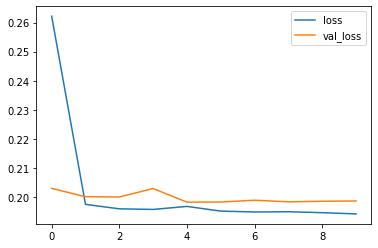

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Experimentar modificando el `patience` y el `min_delta` para ver la diferencia que existe.